![miad4.png](Archivos/miad4.png)

# Laboratorio 1

## Desarrollo de una herramienta analítica usando recursos nativos de Python

Para el desarrollo de esta actividad debes utilizar únicamente recursos nativos de Python (puedes usar librerías como `math` y `random`). Está prohibido el uso de librerías externas, a excepción de `matplotlib`. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

En algunas de las misiones encontrarás: una **versión base**, la cual indica el requerimiento mínimo de la misión; una **versión completa**, la cual indica mejoras deseables o complementos a la **versión base**. Un desarrollo aceptable del laboratorio debe satisfacer la **versión base** y un desarrollo correcto del laboratorio debe satisfacer la **versión completa**. Cumplir con el desarrollo de la **versión completa** desde un inicio hará más sencillas las misiones siguientes.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos en estructuras de Python.
3. Crear y llamar funciones.
4. Implementar condicionales diferenciando `if`, `elif` y `else`.
5. Implementar ciclos diferenciando el propósito de `for` y `while`.

## Contexto: exploración del potencial para asignar becas Unialpes

La Universidad de los Alpes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Becas para los Mejores, entre otros, han sido revolucionarios al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades más prestigiosas del país.

Actualmente, la universidad quiere evaluar el potencial impacto que tendrían algunos programas de acción afirmativa para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas a personas interesadas en becas. Se cuenta con información respecto a la edad, género, estado civil, estrato socioeconómico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas encuestadas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar a los beneficiarios de las becas. Puntualmente, se espera que, para distintas reglas de selección (ej., pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca una caracterización de los potenciales beneficiarios de las becas (a partir de estadísticas descriptivas y visualizaciones), de forma que exista un sustento para elegir la regla de selección adecuada.

## Fase 1: obtener e inspeccionar archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo y, por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano (`.txt`). Cada archivo corresponde a uno de los atributos antes mencionados y están estructurados de forma que todos relacionan a las personas encuestadas en el mismo orden (i.e., en cada archivo la primera línea corresponde a un dato de la primera persona encuestada, la segunda línea corresponde a un dato de la segunda persona encuestada, etc.).

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

### Misión 1

**Versión base**: utiliza métodos de lectura de archivos para guardar la información de cada archivo en una estructura de datos de Python, de manera que se respete el orden y la categoría de los datos.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** y llámala dentro de un ciclo para automatizar la lectura de los archivos.

In [1]:
# Implementa tu respuesta en esta celda
def archivo_a_lista(cadena:str)->list:
    lista = []
    with open(cadena,"r") as f:
        for linea in f:
            try: 
                # Intentar convertir la linea a entero
                linea = int(linea.split("\n")[0])
            except ValueError:
                try: 
                    # Itentar convertir la linea a float
                    linea = float(linea.split("\n")[0])
                except ValueError:
                    
                    linea = linea.split("\n")[0]
            lista.append(linea)
    return lista


def agrupar_txt(ruta_carpeta:str)->dict:
    import os
    diccionario = {}
    archivos = os.listdir(ruta_carpeta)
    archivos_txt = []

    archivos_txt = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith('.txt')]
    
    for txt in archivos_txt:
        nombre_txt = os.path.join(ruta_carpeta, txt)
        lista = archivo_a_lista(nombre_txt)
        diccionario[os.path.splitext(txt)[0]] = lista
        
    return diccionario

ruta_carpeta = "./Archivos"
poblacion = agrupar_txt(ruta_carpeta)

### Misión 2

**Versión base**: calcula estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable relevante en el contexto del problema y repórtalas concluyendo acerca de las principales características de los datos.

**Versión completa**: complementa la **versión base** con visualizaciones informativas sobre los datos (ej., histogramas, gráficos de dispersión, boxplots, etc.), relevantes para el problema.

-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADISTICAS DESCRIPTIVAS - VARIABLES NÚMERICAS                                    

-----------------------------------------------------------------------------------------------------------------------------

TOTAL = 500 personas.

ESTRATO
Media     	2.31
Mediana   	2
Varianza  	0.96
Desviación	0.98
Rango     	4
Mínimo    	1
Máximo    	5




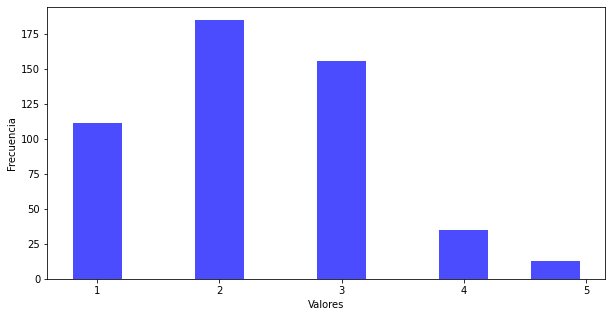



EDAD
Media     	48.75
Mediana   	49
Varianza  	346.46
Desviación	18.61
Rango     	62
Mínimo    	18
Máximo    	80




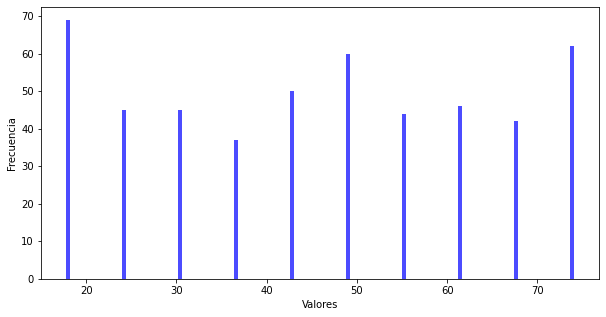



PROMEDIO
Media     	2.62
Mediana   	2.7
Varianza  	1.25
Desviación	1.12
Rango     	5.0
Mínimo    	0.0
Máximo    	5.0




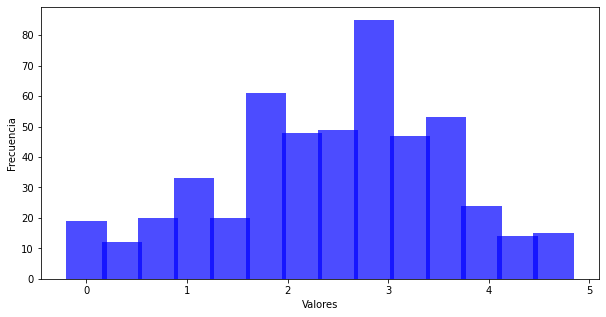



-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  

-----------------------------------------------------------------------------------------------------------------------------

ESTADO_CIVIL
casada	199
divorciada	137
soltera	148
viuda	16




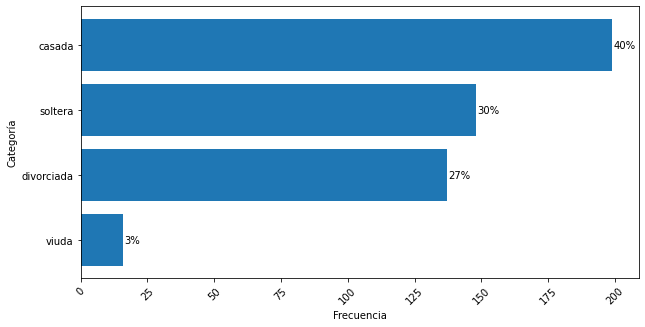

REGION
Region_1	142
Region_2	117
Region_3	33
Region_4	193
Region_5	15




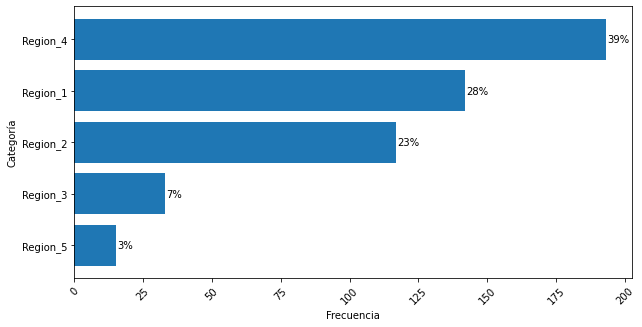

GENERO
masculino	204
femenino	251
otro	6
no binario	39




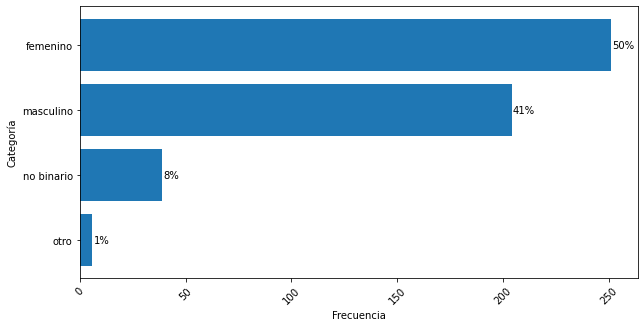

ESCOLARIDAD
Secundaria	343
Profesional	117
Primaria	25
Maestria	15




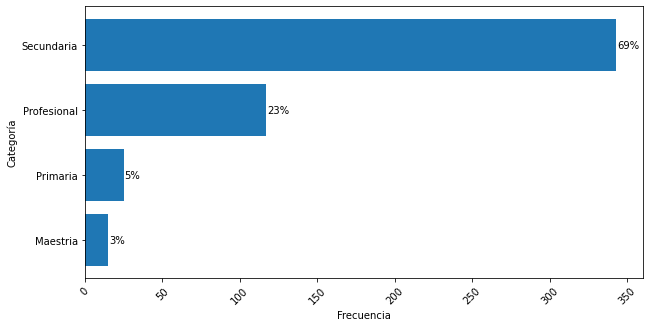

In [2]:
# Implementa tu respuesta en esta celda
def calcular_estadisticas(diccionario:dict)->None:
    
    # importar librerias a usar
    import math
    import matplotlib.pyplot  as plt
    import numpy as np
    

    media = {}
    mediana = {}
    varianza = {}
    desviacion = {}
    minimo = {}
    maximo = {}
    rango = {}
    conteo_categorias = {}

    for i, lista in diccionario.items():
        if all(isinstance(x, (int, float)) for x in lista):
            
            # CALCULO DE ESTADÍSTICAS PARA VARIABLES NUMÉRICAS 
            # Calcular la media para cada variable numérica
            media [i] = round(sum(lista)/len(lista),2)
            
            # Calcular la mediana para cada variable numérica
            lista = sorted(lista)
            mediana [i] = lista[len(lista)//2]
            
            # Calcular la varianza para cada variable numérica
            varianza [i] = round(sum((x - media[i]) ** 2 for x in lista)/(len(lista)-1),2)
            
            # Calcular la desviacion para cada variable numérica
            desviacion[i] = round(math.sqrt(varianza[i]),2)
            
            # Calcular el minimo y maximo para cada variable numérica
            minimo[i] = min(lista)
            maximo[i] = max(lista)
            
            # Calcular el rango para cada variable numérica
            rango[i] = maximo[i]-minimo[i]
        else:

            # Calcular el conteo de cada grupo para cada variable categórica
            if i not in conteo_categorias:
                conteo_categoria = {}
            else:
                conteo_categoria = conteo_categorias[i]

            for k in lista:
                if k not in conteo_categoria:
                    conteo_categoria[k] = 1
                else:
                    conteo_categoria[k] += 1
                       
            conteo_categorias[i] = conteo_categoria

    print("-----------------------------------------------------------------------------------------------------------------------------\n")
    print("                                          ESTADISTICAS DESCRIPTIVAS - VARIABLES NÚMERICAS                                    \n")
    print("-----------------------------------------------------------------------------------------------------------------------------\n")
    print("TOTAL = " + str(len(diccionario["edad"])) + " personas.\n")
    for i, lista in diccionario.items():
        if all(isinstance(x, (int, float)) for x in lista):
            print(str(i.upper()))
            print("Media     \t" + str(media[i]))
            print("Mediana   \t" + str(mediana[i]))
            print("Varianza  \t" + str(varianza[i]))
            print("Desviación\t" + str(desviacion[i]))
            print("Rango     \t" + str(rango[i]))
            print("Mínimo    \t" + str(minimo[i]))
            print("Máximo    \t" + str(maximo[i]))
            print("\n")
            
            # Histograma para cada variable númerica
            plt.figure(figsize=(10, 5))
            hist, bins = np.histogram(sorted(lista), bins='auto')
            plt.bar(bins[:-1], hist, alpha=0.7, width=0.4, color='blue')
            #plt.title(f'Histograma para {i}')
            plt.xlabel('Valores')
            plt.ylabel('Frecuencia')
            plt.show()
            print("\n")

    print("-----------------------------------------------------------------------------------------------------------------------------\n")
    print("                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  \n")
    print("-----------------------------------------------------------------------------------------------------------------------------\n")

    for i, lista in diccionario.items():
        if all(isinstance(x, (str)) for x in lista):
            print(str(i.upper()))
            for llave, valor in conteo_categorias[i].items():
                print(str(llave) + "\t" + str(valor))
            print("\n")
            
            categorias = list(conteo_categorias[i].keys())
            conteos = list(conteo_categorias[i].values())
            categorias, conteos = zip(*sorted(zip(categorias, conteos), key=lambda x: x[1], reverse=False))
            plt.figure(figsize=(10, 5))
            bars = plt.barh(categorias, conteos)
            
            for bar, conteo in zip(bars, conteos):
                porcentaje = (conteo / sum(conteos)) * 100
                plt.text(conteo + 0.5, bar.get_y() + bar.get_height() / 2, f'{porcentaje:.0f}%', va='center')
                
            plt.ylabel('Categoría')
            plt.xlabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.show()
 
    return None

calcular_estadisticas(poblacion)

##### Conclusiones
- El grupo de personas interesadas en las becas presenta una diversidad significativa en cuanto a su edad, sin una distribución claramente definida. Se observan sesgos tanto hacia edades más jóvenes como hacia edades más avanzadas, lo que demuestra la amplia gama de solicitantes, desde jóvenes hasta adultos mayores de 60 años. La edad que prevalece con mayor frecuencia es de 49 años, lo que indica que la mayoría de los aspirantes a estas becas son adultos.

- En cuanto a la situación socioeconómica de este grupo, predomina la categoría de baja a media. La mayoría de los solicitantes se concentran en los estratos 2, 3 y 1, lo que sugiere que gran parte de la población carece de los recursos económicos necesarios para financiar sus estudios.

- El rendimiento académico de la muestra es notablemente bajo, tanto la media como la mediana de las calificaciones se sitúan por debajo de 3.0, que es la nota mínima requerida para aprobar.

- En lo que respecta a los niveles educativos, el 69% de las personas han completado la educación secundaria, mientras que el 23% posee un título profesional. Esto sugiere que muchos de ellos podrían estar buscando becas para estudios de pregrado o posgrado.

- En cuanto al estado civil de los solicitantes, el 40% están casados, el 30% son solteros, y el resto se encuentra en la categoría de divorciados o viudos.

- En términos de género, la población interesada está predominantemente compuesta por mujeres, seguidas por los hombres, con un pequeño porcentaje de personas que se identifican con otro género.

## Fase 2: abordar la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que considerar las características sociodemográficas (ej., género, región, etc.) es parte del espíritu del programa, mientras que otros piensan que el criterio de selección debería centrarse estrictamente en lo económico y académico. Dado esto, el comité ha sugerido evaluar dos propuestas, suponiendo un número $N$ de becas disponibles.

* La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico.

* La segunda propuesta sugiere que se deben tomar en orden ascendente los estratos y, en cada uno de ellos, asignar una beca a cada una de las personas que se encuentren dentro del 2% con mejor promedio académico en esa subpoblación. En caso de quedar becas disponibles luego de haber cubierto todos los estratos, se repite el mismo esquema hasta asignar todas las becas disponibles, excluyendo a las personas a quienes se les haya asignado una beca en alguna ronda anterior.

### Misión 3

Define la pregunta de negocio y la pregunta de *analytics* para esta situación.

### Implementa tu respuesta en esta celda


##### Pregunta de negocio
¿Se deberia construir una programa de becas que considere caracteristicas sociodemográficas o caracteristicas económicas y de desempeño académico? ¿Se deberia construir un programa mixto que combine los dos tipos de caracteristicas?

##### Pregunta de Analytics
¿La propuesta de variables sociodemográficas beneficia género más a que a otros géneros?
¿Es homogeénea la distribucción de las personas según su estrato ecónomico cuando se tiene en cuenta el desempeño acadeé+ico?

### Misión 4

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la primera propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [3]:
# Implementa tu respuesta en esta celda
def becados_1_propuesta(n_becas:int, diccionario:dict)->dict:
    
    # crear un nuevo diccionario donde se guardara un diccionario con cada combinacion
    sub_poblacion = {}

    for i in range(len(diccionario["edad"])):

        # seleccionar la categoria de region y genero
        region = diccionario["region"][i]
        genero = diccionario["genero"][i]

        # crear nueva llave combinada
        region_genero = (region,genero)

        # si la llave no esta en el nuevo diccionario, se agrega un sub diccionario vacio
        if region_genero not in sub_poblacion:
            sub_poblacion[region_genero] = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[],"genero":[genero],"promedio":[],"region":[region]}

        # recorrer el diccionario principal para llenar los datos de cada combinacion    
        for llave1 in diccionario:
            sub_poblacion[region_genero][llave1].append(diccionario[llave1][i])

    # Organizar el nuevo diccionario de los sub grupos de manera descendente por el promedio
    for k, diccionario1 in sub_poblacion.items():
        indices_ordenados = sorted(range(len(diccionario1["promedio"])),key=lambda i: diccionario1["promedio"][i],reverse=True)

        for llave in diccionario1:
            diccionario1[llave] = [diccionario1[llave][i] for i in indices_ordenados] 
        
    # Calcular el numero de becas por cada sub grupo
    num_becas_grupo = {}

    for k in sub_poblacion:
        num_becas_grupo[k] = int(round(((len(sub_poblacion[k]["edad"]))/(len(diccionario["edad"])-1))*n_becas,0))
    
    # Crear nuevo diccionario con los becados de cada su combinacion de region y genero
    sub_poblacion_becados = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[],"genero":[],"promedio":[],"region":[]}
    
    for k, diccionario in sub_poblacion.items():   
        for m, lista in diccionario.items():
            sub_poblacion_becados[m].extend(lista[:num_becas_grupo[k]])
        
    return sub_poblacion_becados

### Misión 5

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la segunda propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [4]:
# Implementa tu respuesta en esta celda
def calcular_percentil(lista, percentil):

    if not lista:
        raise ValueError("La lista no puede estar vacía")

    if not (0 <= percentil <= 100):
        raise ValueError("El percentil debe estar en el rango de 0 a 100")

    # Ordenar la lista
    lista_ordenada = sorted(lista)

    # Calcular la posición del percentil en la lista ordenada
    posicion_percentil = (percentil / 100) * (len(lista_ordenada) - 1)

    # Verificar si la posición es un número entero
    if posicion_percentil.is_integer():
        # Si la posición es un número entero, tomar el valor en esa posición
        percentil_calculado = lista_ordenada[int(posicion_percentil)]
    else:
        # Si la posición no es un número entero, realizar una interpolación lineal
        posicion_inf = int(posicion_percentil)
        posicion_sup = posicion_inf + 1
        valor_inf = lista_ordenada[posicion_inf]
        valor_sup = lista_ordenada[posicion_sup]
        fraccion_sup = posicion_percentil - posicion_inf
        percentil_calculado = valor_inf + fraccion_sup * (valor_sup - valor_inf)

    return round(percentil_calculado,1)

def becados_2_propuesta(n_becas:int, diccionario:dict)->dict:
    
    # crear un nuevo diccionario donde se guardara un diccionario con cada combinacion
    sub_poblacion = {}

    for i in range(len(diccionario["edad"])):

        # seleccionar la categoria de estrato
        estrato = diccionario["estrato"][i]

        # si la llave no esta en el nuevo diccionario, se agrega un sub diccionario vacio
        if estrato not in sub_poblacion:
            sub_poblacion[estrato] = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[estrato],"genero":[],"promedio":[],"region":[]}

        # recorrer el diccionario principal para llenar los datos de cada combinacion    
        for llave1 in diccionario:
            sub_poblacion[estrato][llave1].append(diccionario[llave1][i])

    # Organizar el nuevo diccionario de los sub grupos de manera descendente por el promedio
    for k, diccionario1 in sub_poblacion.items():
        indices_ordenados = sorted(range(len(diccionario1["promedio"])),key=lambda i: diccionario1["promedio"][i],reverse=True)

        for llave in diccionario1:
            diccionario1[llave] = [diccionario1[llave][i] for i in indices_ordenados] 

    # Ciclo que evalua de manera ascendente en rangos del 2% los mejores promedios en cada estrato hasta completar el numero de becas a asignar 
    percentil = 98 # Percentil que es el punto de partida
    num_becas_grupo = {}

    while sum(num_becas_grupo.values()) < n_becas:

        # Calcular en cada sub grupo, los promedios que se encuentran dentro del 2% con mejor promedio académico
        percentiles = {}
        
        for k, diccionario1 in sub_poblacion.items():
            percentiles[k] = calcular_percentil(diccionario1["promedio"],percentil)

        # Calcular el numero de becas por cada sub grupo
        for k in sub_poblacion:
            num_becas_grupo[k] = len([x for x in sub_poblacion[k]["promedio"] if x >= percentiles[k]])

        percentil = percentil - 2
 
    # Crear nuevo diccionario con los becados de cada su combinacion de region y genero
    sub_poblacion_becados = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[],"genero":[],"promedio":[],"region":[]}
    
    for k, diccionario1 in sub_poblacion.items():   
        for m, lista in diccionario1.items():
            sub_poblacion_becados[m].extend(lista[:num_becas_grupo[k]])
        
    return sub_poblacion_becados

### Misión 6

**Versión base**: con base en tu desarrollo de las misiones 2, 4 y 5, implementa un procedimiento que le permita al comité comparar las dos propuestas, exponiendo métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas que se obtendrían con cada propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** de manera automática para ambas propuestas.

In [14]:
# Implementa tu respuesta en esta celda
def calcular_estadisticas_comparativo(diccionario1:dict, diccionario2:dict):
    
    # importar librerias a usar
    import math
    import matplotlib.pyplot  as plt
    import numpy as np

    # crear diccionarios para guardar las estadisticas a calcular
    media = {}
    mediana = {}
    varianza = {}
    desviacion = {}
    minimo = {}
    maximo = {}
    rango = {}
    conteo_categorias = {}
    j = 0
            
    for diccionario in [diccionario1,diccionario2]:
        for i, lista in diccionario.items():
            if all(isinstance(x, (int, float)) for x in lista):
                
                # CALCULO DE ESTADÍSTICAS PARA VARIABLES NUMÉRICAS 
                
                # Calcular la media para cada variable numérica
                if i not in media:
                    media[i] = []
                media[i].append(round(sum(lista)/len(lista),2))
                
                # Calcular la mediana para cada variable numérica
                lista = sorted(lista)
                if i not in mediana:
                    mediana[i] = []
                mediana[i].append(lista[len(lista)//2])
                
                # Calcular la varianza para cada variable numérica
                if i not in varianza:
                    varianza[i] = []
                varianza[i].append(round(sum((x - media[i][j]) ** 2 for x in lista)/(len(lista)-1),2))
                
                # Calcular la desviacion para cada variable numérica
                if i not in desviacion:
                    desviacion[i] = []
                desviacion[i].append(round(math.sqrt(varianza[i][j]),2))
                
                # Calcular el minimo y maximo para cada variable numérica
                if i not in minimo:
                    minimo[i] = []
                if i not in maximo:
                    maximo[i] = [] 
                minimo[i].append(min(lista))
                maximo[i].append(max(lista))
                
                # Calcular el rango para cada variable numérica
                if i not in rango:
                    rango[i] = []
                rango[i].append(maximo[i][j]-minimo[i][j])
                
            else:
                #pass
                # CALCULO DE ESTADÍSTICAS PARA VARIABLES CATEGÓRICAS
                
                # Calcular el conteo de cada grupo para cada variable categórica
                if i not in conteo_categorias:
                    conteo_categoria = {}
                else:
                    conteo_categoria = conteo_categorias[i]

                for k in lista:
                    if k not in conteo_categoria:
                        conteo_categoria[k] = [1,0]
                    else:
                        conteo_categoria[k][j] += 1
                       
                conteo_categorias[i] = conteo_categoria
        j += 1
    print("-----------------------------------------------------------------------------------------------------------------------------\n")
    print("                                          ESTADISTICAS DESCRIPTIVAS - VARIABLES NÚMERICAS                                    \n")
    print("-----------------------------------------------------------------------------------------------------------------------------\n")
    for i, lista in diccionario1.items():
        if all(isinstance(x, (int, float)) for x in lista):
            print(str(i.upper()))
            print("                Propuesta 1 - Propuesta 2")
            print("Media     \t" + str(media[i][0]) + " - " + str(media[i][1]))
            print("Mediana   \t" + str(mediana[i][0]) + " - " + str(mediana[i][1]))
            print("Varianza  \t" + str(varianza[i][0]) + " - " + str(varianza[i][1]))
            print("Desviación\t" + str(desviacion[i][0]) + " - " + str(desviacion[i][1]))
            print("Rango     \t" + str(rango[i][0]) + " - " + str(rango[i][1]))
            print("Mínimo    \t" + str(minimo[i][0]) + " - " + str(minimo[i][1]))
            print("Máximo    \t" + str(maximo[i][0]) + " - " + str(maximo[i][1]))
            print("\n")
            plt.figure(figsize=(10, 5)) 
            hist1, bins1 = np.histogram(sorted(diccionario1[i]), bins='auto')
            hist2, bins2 = np.histogram(sorted(diccionario2[i]), bins='auto')
            plt.bar(bins1[:-1], hist1, alpha=0.7, width=0.2, label='Propuesta 1', color='blue')
            plt.bar(np.array(bins2[:-1])+0.1, hist2, alpha=0.7, width=0.2, label='Propuesta 2', color='red')
            plt.ylim(0, max(max(hist1), max(hist2)) + 5)
            plt.xlabel('Valores')
            plt.ylabel('Frecuencia')
            plt.legend()
            plt.show()
            print("\n")

    print("-----------------------------------------------------------------------------------------------------------------------------\n")
    print("                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  \n")
    print("-----------------------------------------------------------------------------------------------------------------------------\n")

    for i, lista in diccionario1.items():
        if all(isinstance(x, (str)) for x in lista):
            print(str(i.upper()))
            print("                Propuesta 1 - Propuesta 2")
            for llave, lista in conteo_categorias[i].items():
                print(str(llave) + "\t" + str(lista[0])+ " - " +str(lista[1]))
            print("\n")
            
            sorted_data = sorted(conteo_categorias[i].items(), key=lambda x: x[1][1], reverse=False)
            categorias = [item[0] for item in sorted_data]
            serie1 = [item[1][0] for item in sorted_data]
            serie2 = [item[1][1] for item in sorted_data]         
            y = np.arange(len(categorias))
            ancho = 0.25
            fig, ax = plt.subplots()
            bar1 = ax.barh(y - ancho/2, serie1, ancho, label='Propuesta 1', color='b')
            bar2 = ax.barh(y + ancho/2, serie2, ancho, label='Propuesta 2', color='r')
            ax.set_yticks(y)
            ax.set_yticklabels(categorias)
            ax.legend()
            plt.show()
        
    return None

## Fase 3: desarrollar una solución analítica

Reconociendo la complejidad de este problema y viendo el potencial del análisis de datos para enriquecer la discusión, el comité requiere una herramienta analítica que permita definir y evaluar nuevas propuestas de asignación de becas. Se debe poder:

1. Ingresar el número de becas disponibles (ej., `N=0`).


2. Ingresar un rango de edad para los candidatos factibles (ej., `min_edad=99, max_edad=100`).


3. Elegir cualesquiera de las siguientes tres características: género, estrato, región (ej., `caracteristicas=["genero", "estrato"]`).

    
4. Ingresar interactivamente (durante la ejecución de la herramienta) el porcentaje del total de las becas que se asignará a las personas con mejor promedio académico dentro de cada una de las combinaciones de las características elegidas. Por ejemplo, si se eligen las características `"genero"` y `"estrato"`, deberá asignarse un porcentaje a cada combinación (ej., asignar 3\% de las becas al género `"masculino"` del estrato `1`, asignar 5\% de las becas al género `"femenino"` del estrato `1`, etc.).

La herramienta debe permitir al comité configurar una nueva propuesta y seleccionar al grupo de potenciales beneficiarios de las becas de acuerdo con la propuesta configurada. Además, la herramienta debe exponer métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas.

### Misión 7

Desarrolla un algoritmo que reciba los parámetros para configurar la nueva propuesta y seleccione a los potenciales beneficiarios de las becas.

In [8]:
# Implementa tu respuesta en esta celda
def configurar_propuesta(diccionario:dict)->dict:

    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("                                              CONFIGURACIÓN DE NUEVA PROPUESTA DE BECAS                                        ")
    print("-------------------------------------------------------------------------------------------------------------------------------")

    n_becas = int(input("Ingrese el número de becas disponibles: "))
    rango_edad = input("Ingrese un rango de edad para los candidatos factibles. Ingresar en el formato min-max: ")
    min_edad = int(rango_edad.split('-')[0])
    max_edad = int(rango_edad.split('-')[1])
    caracteristicas = input("Elegir cualesquiera de las siguientes tres características: género, estrato, región. Ingresar las caracteristicas separadas por comas y sin tildes: ")

    while not caracteristicas:
        caracteristicas = input("Elegir cualesquiera de las siguientes tres características: género, estrato, región. Ingresar las caracteristicas separadas por comas y sin tildes: ") 
    
    porcentaje_becas = {}
    
    # crear un diccionario con la(s) categoria(s) de la caracteristica(s) seleccionada(s)
    if caracteristicas.count(",") == 0:
        caracteristica1 = (caracteristicas.split(',')[0]).lower()
        
        for i in range(len(diccionario["edad"])):
            llave = (diccionario[caracteristica1][i])
            # si la llave no esta en el nuevo diccionario, se agrega un sub diccionario vacio
            if llave not in porcentaje_becas:
                porcentaje_becas[llave] = {}
                
    elif caracteristicas.count(",") == 1:
        caracteristica1 = (caracteristicas.split(',')[0]).lower()
        caracteristica2 = (caracteristicas.split(',')[1]).lower()
        
        for i in range(len(diccionario["edad"])):
            llave = (diccionario[caracteristica1][i],diccionario[caracteristica2][i])
            # si la llave no esta en el nuevo diccionario, se agrega un sub diccionario vacio
            if llave not in porcentaje_becas:
                porcentaje_becas[llave] = {}
                
    elif caracteristicas.count(",") == 2:
        caracteristica1 = (caracteristicas.split(',')[0]).lower()
        caracteristica2 = (caracteristicas.split(',')[1]).lower()
        caracteristica3 = (caracteristicas.split(',')[2]).lower()

        for i in range(len(poblacion["edad"])):
            llave = (diccionario[caracteristica1][i],diccionario[caracteristica2][i],diccionario[caracteristica3][i])
            # si la llave no esta en el nuevo diccionario, se agrega un sub diccionario vacio
            if llave not in porcentaje_becas:
                porcentaje_becas[llave] = {}
                
    # crear un nuevo diccionario donde se guardara un diccionario con cada combinacion
    sub_poblacion = {}



    # mostrar las combinaciones existentes al usuario
    print("\n")
    print("-------------------------------------")
    print("             COMBINACIONES           ")
    print("-------------------------------------")
    for i in porcentaje_becas:
        print(str(i).upper())
    
    print("\n")
    
    # se llena el diccionario con los datos ingresados por el usuario
    print("Ingrese el porcentaje total de becas a asignar. Ingresar en porcentaje sin incluir %.\n")
    for i in porcentaje_becas:
        porcentaje_becas[i] = (int(input(str(i).upper() + " = ")))/100
        
    if sum(porcentaje_becas.values())< 1 or sum(porcentaje_becas.values())> 1:
        print("Ingrese nuevamente el porcentaje total de becas a asignar. La suma de porcentajes da mayor a 100%.\n")
        for i in porcentaje_becas:
            porcentaje_becas[i] = (int(input(str(i).upper() + " = ")))/100

    for llave in porcentaje_becas:
        # si la llave no esta en el nuevo diccionario, se agrega un diccionario vacio
        if llave not in porcentaje_becas:
            sub_poblacion[llave] = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[],"genero":[],"promedio":[],"region":[]}

    for i in range(len(diccionario["edad"])):
        
        if caracteristicas.count(",") == 0:
            llave = (diccionario[caracteristica1][i])
        elif caracteristicas.count(",") == 1:
            llave = (diccionario[caracteristica1][i],diccionario[caracteristica2][i])
        elif caracteristicas.count(",") == 2:
            llave = (diccionario[caracteristica1][i],diccionario[caracteristica2][i],diccionario[caracteristica3][i])
        
        # si la llave no esta en el nuevo diccionario, se agrega un sub diccionario vacio
        if llave not in sub_poblacion:
            sub_poblacion[llave] = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[],"genero":[],"promedio":[],"region":[]}
        
        # recorrer el diccionario principal y filtrar si cumple la restriccion de edad antes de agregarlo al sub diciconario
        if min_edad <= diccionario["edad"][i] <= max_edad:
            for llave1 in diccionario:
                sub_poblacion[llave][llave1].append(diccionario[llave1][i])
        
           
    # Organizar el nuevo diccionario de los sub grupos de manera descendente por el promedio
    for k, diccionario1 in sub_poblacion.items():
        indices_ordenados = sorted(range(len(diccionario1["promedio"])),key=lambda i: diccionario1["promedio"][i],reverse=True)

        for llave in diccionario1:
            diccionario1[llave] = [diccionario1[llave][i] for i in indices_ordenados] 

    # Calcular el numero de becas por cada sub grupo
    num_becas_grupo = {}

    for k in sub_poblacion:
        num_becas_grupo[k] = int(round(n_becas*porcentaje_becas[k],0))
    
    # Crear nuevo diccionario con los becados de cada su combinacion de las caracteristicas seleccionadas
    sub_poblacion_becados = {"edad":[],"escolaridad":[],"estado_civil":[],"estrato":[],"genero":[],"promedio":[],"region":[]}
    
    for k, diccionario in sub_poblacion.items():   
        for m, lista in diccionario.items():
            sub_poblacion_becados[m].extend(lista[:num_becas_grupo[k]])
        
    return sub_poblacion_becados

### Misión 8

Con base en tu desarrollo de la misión 7, implementa un algoritmo que: le permita al comité configurar una nueva propuesta; exponga métricas y visualizaciones de las principales características demográficas del grupo de potenciales beneficiarios para la propuesta configurada.

-------------------------------------------------------------------------------------------------------------------------------
                                              CONFIGURACIÓN DE NUEVA PROPUESTA DE BECAS                                        
-------------------------------------------------------------------------------------------------------------------------------
Ingrese el número de becas disponibles: 100
Ingrese un rango de edad para los candidatos factibles. Ingresar en el formato min-max: 25-30
Elegir cualesquiera de las siguientes tres características: género, estrato, región. Ingresar las caracteristicas separadas por comas y sin tildes: genero


-------------------------------------
             COMBINACIONES           
-------------------------------------
MASCULINO
FEMENINO
OTRO
NO BINARIO


Ingrese el porcentaje total de becas a asignar. Ingresar en porcentaje sin incluir %.

MASCULINO = 40
FEMENINO = 50
OTRO = 0
NO BINARIO = 10
-----------------------------

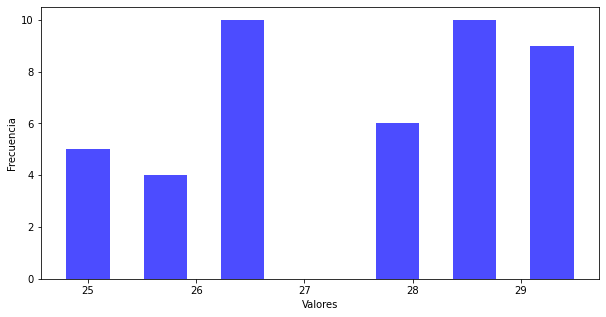



ESTRATO
Media     	2.16
Mediana   	2
Varianza  	0.79
Desviación	0.89
Rango     	3
Mínimo    	1
Máximo    	4




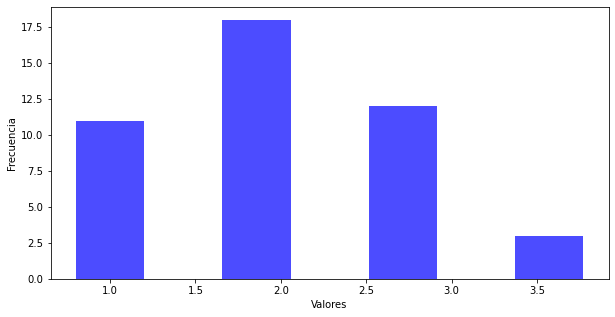



PROMEDIO
Media     	2.66
Mediana   	2.5
Varianza  	1.18
Desviación	1.09
Rango     	4.1
Mínimo    	0.7
Máximo    	4.8




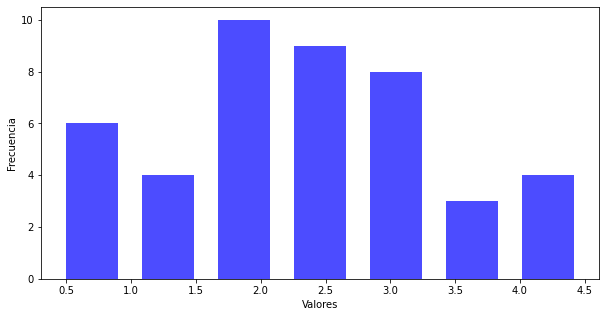



-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  

-----------------------------------------------------------------------------------------------------------------------------

ESCOLARIDAD
Secundaria	32
Profesional	7
Maestria	4
Primaria	1




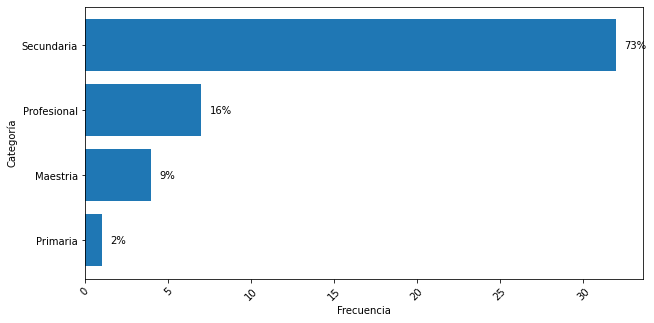

ESTADO_CIVIL
casada	16
soltera	13
divorciada	14
viuda	1




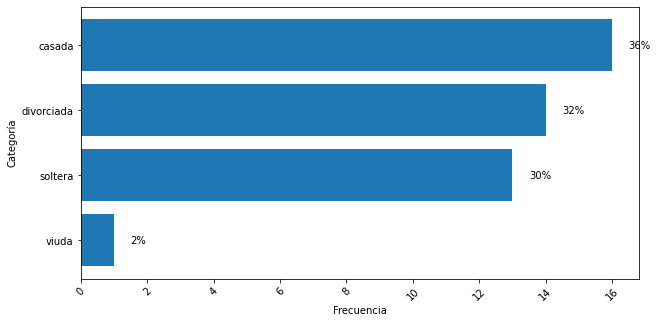

GENERO
masculino	19
femenino	21
no binario	4




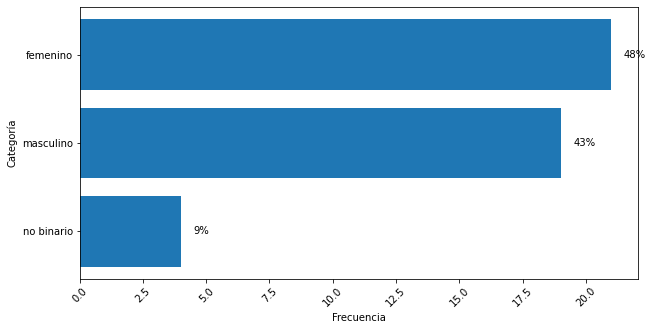

REGION
Region_2	11
Region_1	10
Region_4	16
Region_3	5
Region_5	2




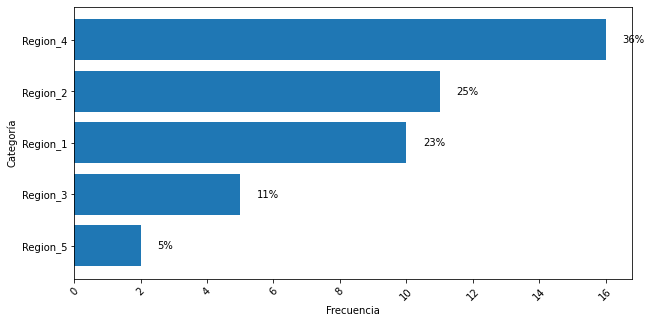

In [9]:
# Implementa tu respuesta en esta celda
def evaluar_propuesta_configurada(diccionario:dict)->None:
    
    diccionario1 = configurar_propuesta(diccionario)
    calcular_estadisticas(diccionario1)
    
    return None

evaluar_propuesta_configurada(poblacion)

### Misión 9

Utiliza tu herramienta para configurar propuestas a tu criterio. Con sustento en las métricas y visualizaciones que obtengas, elige una de las propuestas que configuraste. Compara y concluye acerca de las virtudes y falencias de tu propuesta con respecto a las de las dos propuestas del comité.

In [25]:
# Implementa tu respuesta en esta celda


def menu()->None:
    print("\n\nOPCIONES")
    print("1. Asignar becas con la 1era propuesta.")
    print("2. Asignar becas con la 2da propuesta.")
    print("3. Comparar propuesta 1 y 2.")
    print("4. Configurar una nueva propuesta.")
    print("0. Salir")

def iniciar_aplicacion()->None:
    continuar=True
    while continuar:
        menu()
        
        elegido=int(input("Seleccione una opcion del menu: "))
        if elegido==0:
            continuar=False
        elif elegido==1:
            n_becas = int(input("Ingrese el número de becas disponibles: "))
            becados_propuesta_1 = becados_1_propuesta(n_becas,poblacion)
            
            opcion = int(input("¿Desea ver estadisticas de la propuesta? 1.SI  2.NO "))
            if opcion == 1:
                print("\n")
                calcular_estadisticas(becados_propuesta_1)
            elif opcion == 2: 
                print("\n")
                print("La cantidad de becados es: " + str(len(becados_propuesta_1["edad"])) + " personas.")
            else:
                menu()
            
        elif elegido==2:
            n_becas = int(input("Ingrese el número de becas disponibles: "))
            becados_propuesta_2 = becados_2_propuesta(n_becas,poblacion)
            
            opcion = int(input("¿Desea ver estadisticas de la propuesta? 1.SI  2.NO "))
            if opcion == 1:
                print("\n")
                calcular_estadisticas(becados_propuesta_2)
            elif opcion == 2:
                print("\n")
                print("La cantidad de becados es: " + str(len(becados_propuesta_2["edad"])) + " personas.")
            else:
                menu()
          
        elif elegido==3:
            calcular_estadisticas_comparativo(becados_propuesta_1,becados_propuesta_2) 
            
        elif elegido==4:
            eleccion = True
            while continuar:                
                becados_propuesta_configurada = configurar_propuesta(poblacion)

                opcion = int(input("¿Desea ver estadisticas de la propuesta? 1.SI  2.NO "))
                if opcion == 1:
                    print("\n")
                    calcular_estadisticas(becados_propuesta_configurada)
                    opcion2 = input("¿Desea configurar otra propuesta? 1.SI  2.NO ")
                else:
                    print("\n")
                    print("La cantidad de becados es: " + str(len(becados_propuesta_configurada["edad"])) + " personas.")
                    opcion2 = input("¿Desea configurar otra propuesta? 1.SI  2.NO ")
                    
                if opcion2 == 1:
                    continuar = True
                else:
                    continuar = False
                    
                menu()
        
        else:
            print("Seleccione una opcion del menu:")



OPCIONES
1. Asignar becas con la 1era propuesta.
2. Asignar becas con la 2da propuesta.
3. Comparar propuesta 1 y 2.
4. Configurar una nueva propuesta.
0. Salir
Seleccione una opcion del menu: 1
Ingrese el número de becas disponibles: 100
¿Desea ver estadisticas de la propuesta? 1.SI  2.NO 1


-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADISTICAS DESCRIPTIVAS - VARIABLES NÚMERICAS                                    

-----------------------------------------------------------------------------------------------------------------------------

TOTAL = 97 personas.

EDAD
Media     	50.45
Mediana   	53
Varianza  	310.21
Desviación	17.61
Rango     	62
Mínimo    	18
Máximo    	80




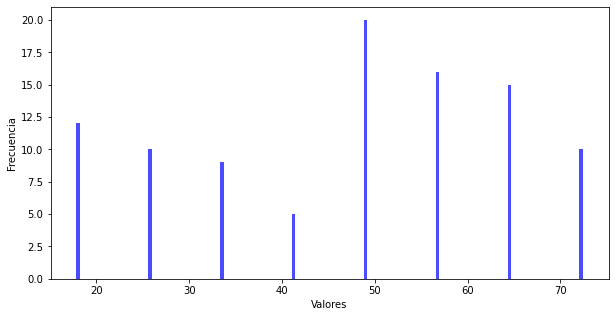



ESTRATO
Media     	2.1
Mediana   	2
Varianza  	0.86
Desviación	0.93
Rango     	4
Mínimo    	1
Máximo    	5




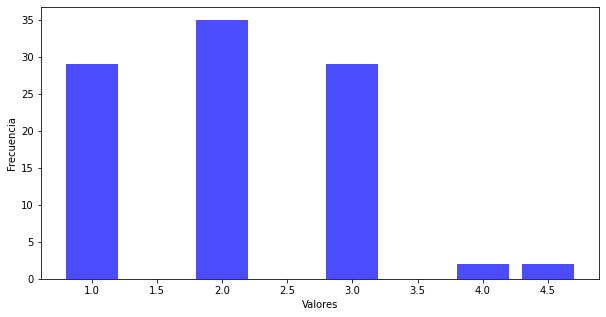



PROMEDIO
Media     	4.08
Mediana   	4.0
Varianza  	0.19
Desviación	0.44
Rango     	2.0
Mínimo    	3.0
Máximo    	5.0




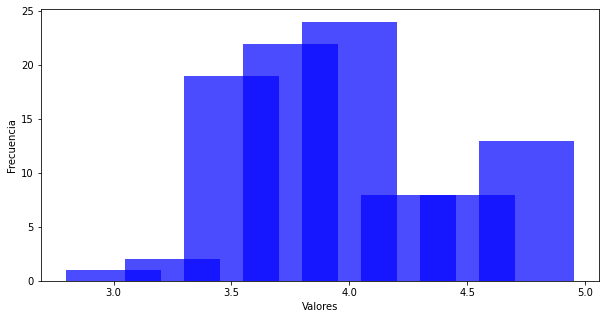



-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  

-----------------------------------------------------------------------------------------------------------------------------

ESCOLARIDAD
Secundaria	63
Profesional	29
Maestria	2
Primaria	3




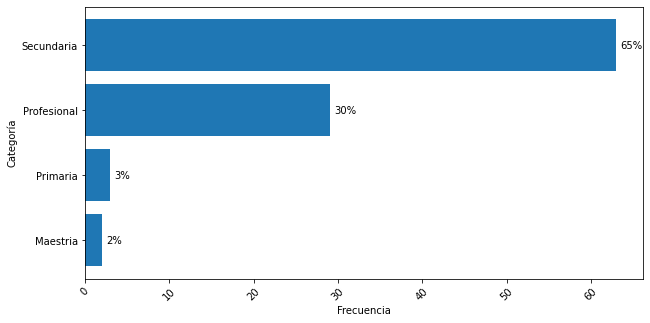

ESTADO_CIVIL
casada	43
divorciada	27
soltera	23
viuda	4




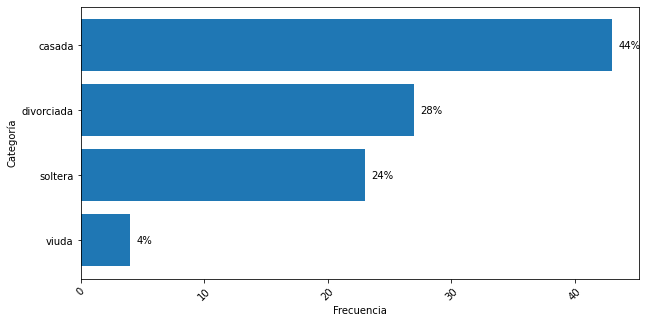

GENERO
masculino	41
femenino	49
no binario	7




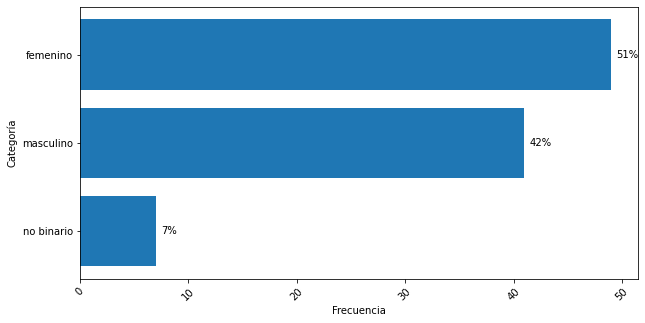

REGION
Region_1	28
Region_2	23
Region_4	38
Region_5	2
Region_3	6




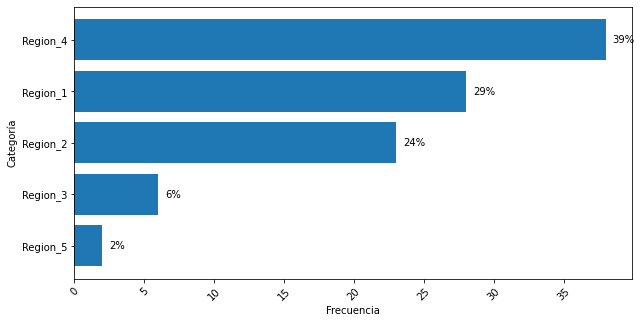



OPCIONES
1. Asignar becas con la 1era propuesta.
2. Asignar becas con la 2da propuesta.
3. Comparar propuesta 1 y 2.
4. Configurar una nueva propuesta.
0. Salir
Seleccione una opcion del menu: 2
Ingrese el número de becas disponibles: 100
¿Desea ver estadisticas de la propuesta? 1.SI  2.NO 1


-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADISTICAS DESCRIPTIVAS - VARIABLES NÚMERICAS                                    

-----------------------------------------------------------------------------------------------------------------------------

TOTAL = 102 personas.

EDAD
Media     	51.46
Mediana   	54
Varianza  	310.07
Desviación	17.61
Rango     	62
Mínimo    	18
Máximo    	80




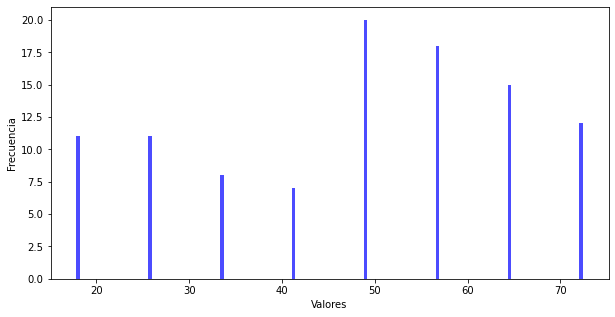



ESTRATO
Media     	2.36
Mediana   	2
Varianza  	1.03
Desviación	1.01
Rango     	4
Mínimo    	1
Máximo    	5




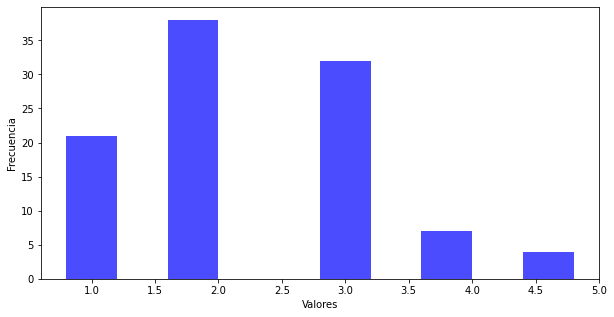



PROMEDIO
Media     	4.05
Mediana   	4.0
Varianza  	0.2
Desviación	0.45
Rango     	1.9
Mínimo    	3.1
Máximo    	5.0




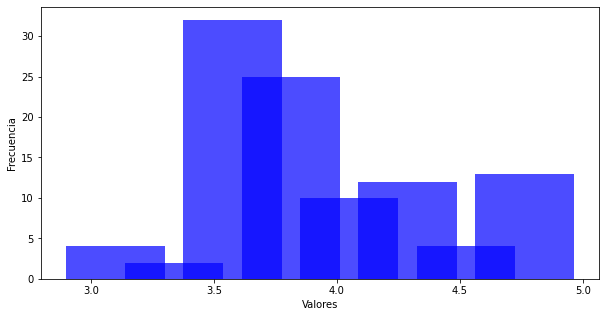



-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  

-----------------------------------------------------------------------------------------------------------------------------

ESCOLARIDAD
Secundaria	62
Profesional	31
Maestria	3
Primaria	6




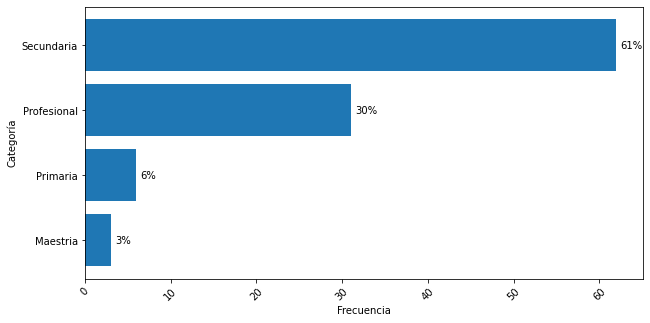

ESTADO_CIVIL
soltera	27
viuda	3
casada	45
divorciada	27




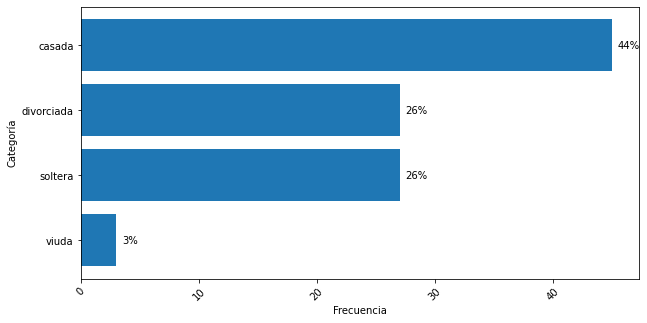

GENERO
no binario	7
femenino	52
masculino	41
otro	2




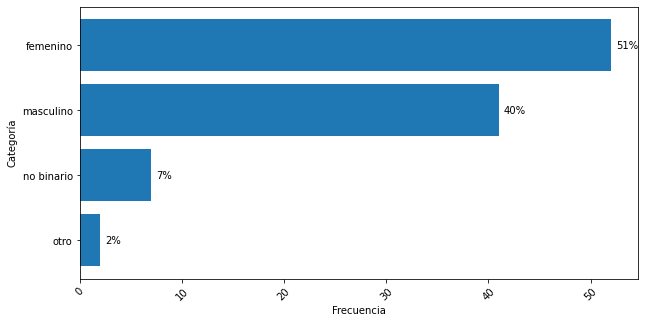

REGION
Region_1	36
Region_3	5
Region_4	35
Region_2	23
Region_5	3




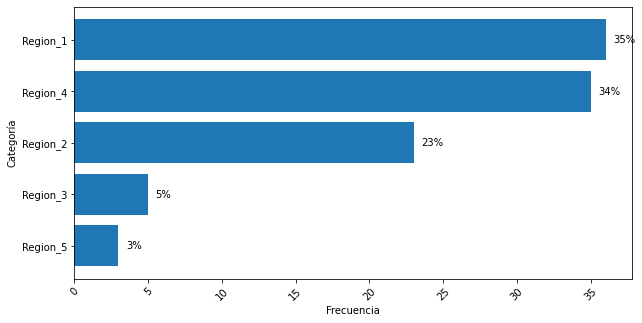



OPCIONES
1. Asignar becas con la 1era propuesta.
2. Asignar becas con la 2da propuesta.
3. Comparar propuesta 1 y 2.
4. Configurar una nueva propuesta.
0. Salir
Seleccione una opcion del menu: 3
-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADISTICAS DESCRIPTIVAS - VARIABLES NÚMERICAS                                    

-----------------------------------------------------------------------------------------------------------------------------

EDAD
                Propuesta 1 - Propuesta 2
Media     	50.45 - 51.46
Mediana   	53 - 54
Varianza  	310.21 - 310.07
Desviación	17.61 - 17.61
Rango     	62 - 62
Mínimo    	18 - 18
Máximo    	80 - 80




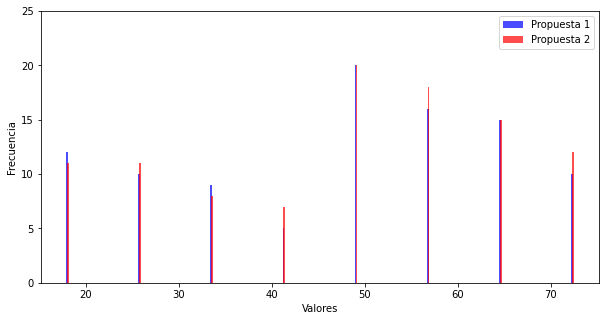



ESTRATO
                Propuesta 1 - Propuesta 2
Media     	2.1 - 2.36
Mediana   	2 - 2
Varianza  	0.86 - 1.03
Desviación	0.93 - 1.01
Rango     	4 - 4
Mínimo    	1 - 1
Máximo    	5 - 5




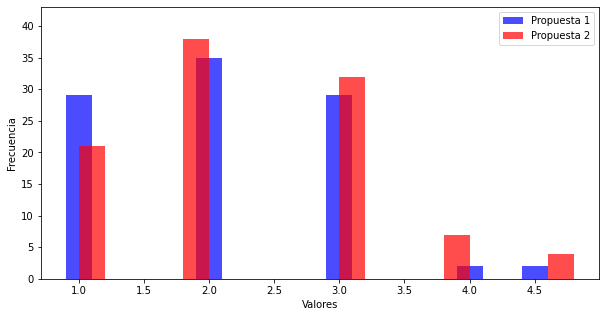



PROMEDIO
                Propuesta 1 - Propuesta 2
Media     	4.08 - 4.05
Mediana   	4.0 - 4.0
Varianza  	0.19 - 0.2
Desviación	0.44 - 0.45
Rango     	2.0 - 1.9
Mínimo    	3.0 - 3.1
Máximo    	5.0 - 5.0




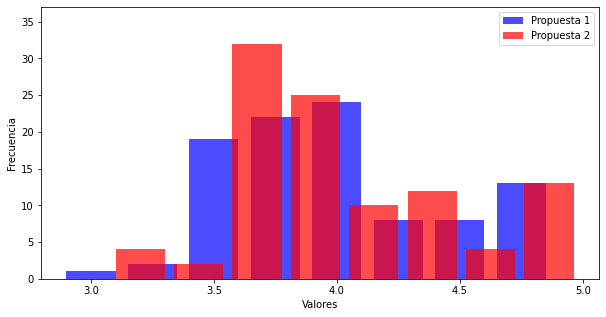



-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  

-----------------------------------------------------------------------------------------------------------------------------

ESCOLARIDAD
                Propuesta 1 - Propuesta 2
Secundaria	63 - 62
Profesional	29 - 31
Maestria	2 - 3
Primaria	3 - 6




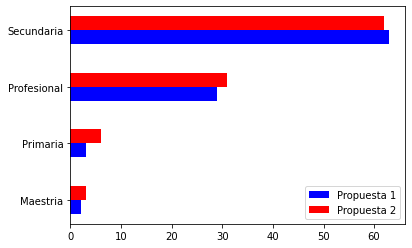

ESTADO_CIVIL
                Propuesta 1 - Propuesta 2
casada	43 - 45
divorciada	27 - 27
soltera	23 - 27
viuda	4 - 3




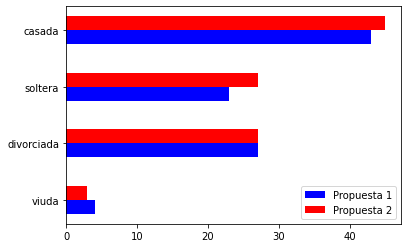

GENERO
                Propuesta 1 - Propuesta 2
masculino	41 - 41
femenino	49 - 52
no binario	7 - 7
otro	1 - 1




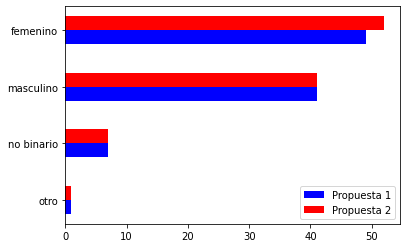

REGION
                Propuesta 1 - Propuesta 2
Region_1	28 - 36
Region_2	23 - 23
Region_4	38 - 35
Region_5	2 - 3
Region_3	6 - 5




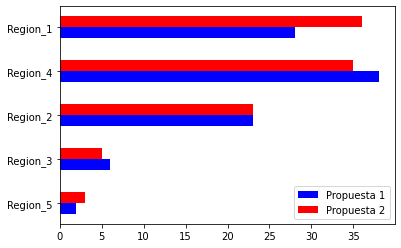



OPCIONES
1. Asignar becas con la 1era propuesta.
2. Asignar becas con la 2da propuesta.
3. Comparar propuesta 1 y 2.
4. Configurar una nueva propuesta.
0. Salir
Seleccione una opcion del menu: 4
-------------------------------------------------------------------------------------------------------------------------------
                                              CONFIGURACIÓN DE NUEVA PROPUESTA DE BECAS                                        
-------------------------------------------------------------------------------------------------------------------------------
Ingrese el número de becas disponibles: 100
Ingrese un rango de edad para los candidatos factibles. Ingresar en el formato min-max: 18-40
Elegir cualesquiera de las siguientes tres características: género, estrato, región. Ingresar las caracteristicas separadas por comas y sin tildes: genero


-------------------------------------
             COMBINACIONES           
-------------------------------------
MASCULINO


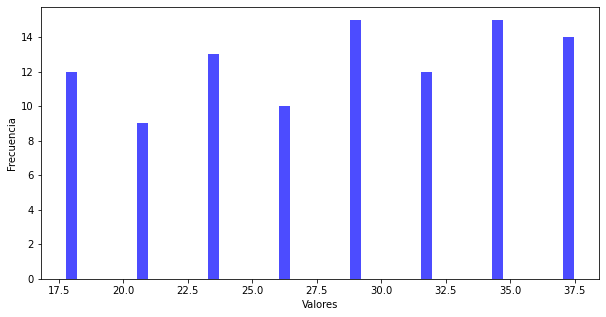



ESTRATO
Media     	2.28
Mediana   	2
Varianza  	0.73
Desviación	0.85
Rango     	4
Mínimo    	1
Máximo    	5




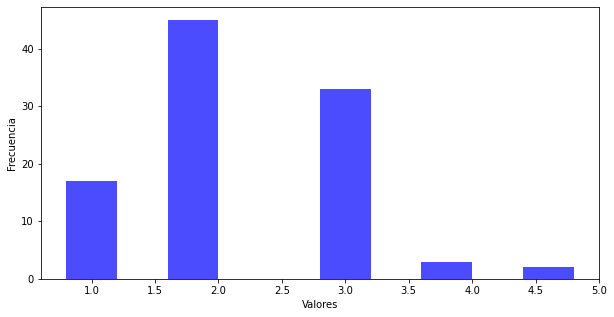



PROMEDIO
Media     	3.26
Mediana   	3.2
Varianza  	0.5
Desviación	0.71
Rango     	3.4000000000000004
Mínimo    	1.5
Máximo    	4.9




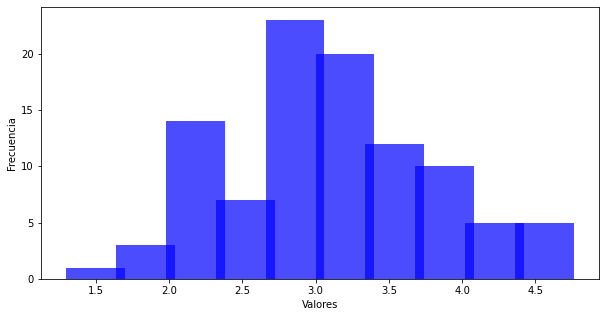



-----------------------------------------------------------------------------------------------------------------------------

                                          ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS                                  

-----------------------------------------------------------------------------------------------------------------------------

ESCOLARIDAD
Secundaria	76
Profesional	19
Primaria	2
Maestria	3




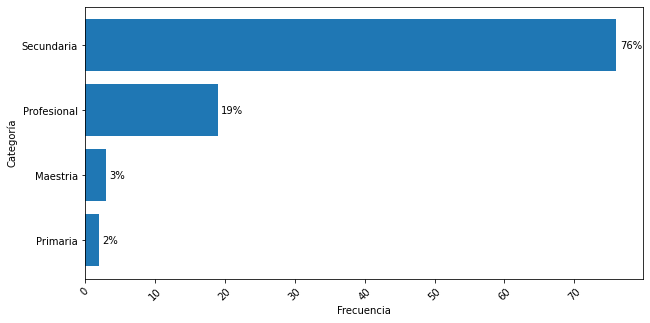

ESTADO_CIVIL
soltera	29
casada	40
viuda	2
divorciada	29




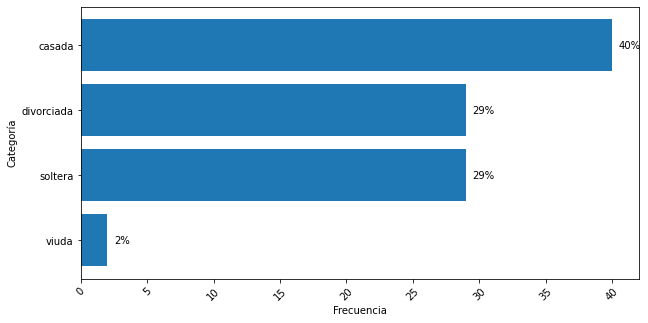

GENERO
masculino	40
femenino	50
no binario	10




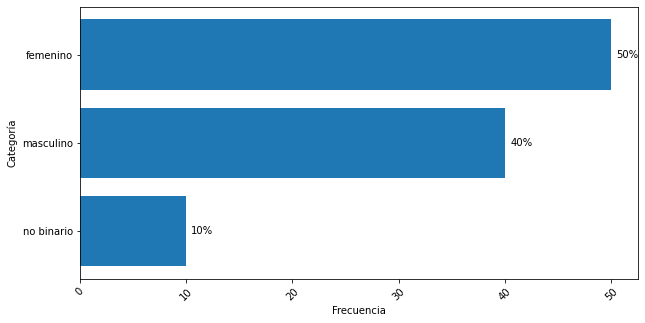

REGION
Region_2	28
Region_5	3
Region_1	26
Region_4	37
Region_3	6




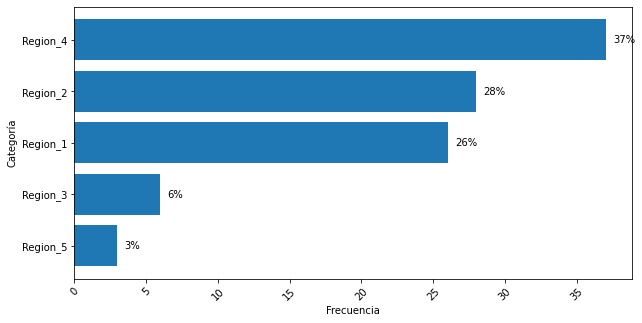

¿Desea configurar otra propuesta? 1.SI  2.NO 2


OPCIONES
1. Asignar becas con la 1era propuesta.
2. Asignar becas con la 2da propuesta.
3. Comparar propuesta 1 y 2.
4. Configurar una nueva propuesta.
0. Salir


In [26]:
iniciar_aplicacion()

### Conclusiones 
La propuesta elegida es la que se configura con la caracteristica del genero y que tiene limitaciones en la edad porque las siguientes razones:
- Se puede limitar la edad de acuerdo a la beca a entregar, una beca de postgrado no se entrega a personas menores de 20 años porque a esa edad aun no se ha terminado el pregrado.
- El estrato predominante en la poblacion es bajo medio, razon por la cual no es necesario limitar desde un inicio.
- A pesar de que el el promedio academico en la población es bajo, la distribuccion en edades menores a 40 años se concentra en mayor parte sobre 3.0.
- El poder configurar la edad permite que exista una homogeneidad en las personas a seleccionar.

Falencias:
- Cuando el subgrupo elegido resultante de la combinacion de las caracteristicas (genero, estrato, region) y la limitacion en edad es pequeño, va a existir becas sin asignar.

## Referencias

* Discriminación Positiva<br>
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez.
 
__Fecha última actualización__: 11/07/2022